#### Thinking1:既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

- 因为内容过滤算法忽视了用户行为，从而也忽视了物品的流行度以及用户行为中所包含的规律，由于考虑的物品的相似性一段时间不会改变，因此可以很容易的离线计算，准确度一般也可以接受，结果的新颖度比较高，但是它的精度比较低。


#### Thinking2:你需要推荐系统么？哪些情况下不需要推荐系统？

- 我需要推荐系统需要满足两个条件：
  - 第一是存在信息过载，难以找到想要的内容；
  - 第二是用当我大部分时候没有明确的需求，好的推荐系统不仅仅能预测用户的行为，更需要帮助用户发现自己的需求、自己可能感兴趣的东西
- 以下情况下不需要推荐系统：
  - 在用户数量没有达到一定的规模的时候，并不是一定要采用推荐系统

#### Thinking3:如果给一个视频打标签，视频中所有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？

- 可能存在背景音乐和视频内容关联性差，甚至毫不相关的情况

#### Action1:使用CART算法对MINIST进行训练

In [76]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

In [77]:
# 加载数据
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [78]:
# 数据探索
data = digits.data
target = digits.target
data.shape

(1797, 64)

In [79]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [80]:
digits.target[0]

0

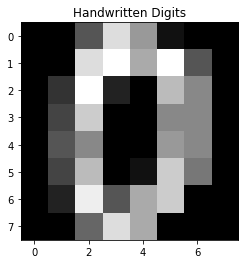

In [81]:
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [82]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x,train_y, test_y = train_test_split(data, target, test_size = 0.25,random_state = 33)

In [83]:
# 采用  规范化
ss = preprocessing.MinMaxScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.fit_transform(test_x)

In [84]:
# 创建 CART 决策树 分类器
model = DecisionTreeClassifier(max_depth = 500,random_state = 0)
model.fit(train_ss_x, train_y)
predict_y = model.predict(test_ss_x)
print('CART 的准确率：%.4lf'%accuracy_score(predict_y,test_y))

# 引入 k 折交叉验证
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model,train_ss_x,train_y,cv = 10)
acc.mean()

CART 的准确率：0.8644


0.8397014925373135

#### Action2:员工离职预测

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

In [ ]:
train = pd.read_csv('./tra')